# Deep Learning 2019
## Assignment 2 - Neural Networks and Loss Functions
Please complete the questions below by modifying this notebook and send this file via e-mail to

__[pir-assignments@l3s.de](mailto:pir-assignments@l3s.de?subject=[DL-2019]%20Assignment%20X%20[Name]%20[Mat.%20No.]&)__

using the subject __[DL-2019] Assignment X [Name] [Mat. No.]__. The deadline for this assignment is __May 7th, 2019, 9AM__.

Programming assignments have to be completed using Python 3. __Please do not use Python 2.__

__Always explain your answers__ (do not just write 'yes' or 'no').

Please add your name and matriculation number below:

__Name:__
<br>
__Mat. No.:__

----

### 1. Multilayer Perceptron

Consider an MLP with $n > 0$ hidden layers $h_1, h_2, ..., h_n$. Let all activation functions in this network be __linear__, i.e. all neurons use the activation function $f(x) = x$. Show that this model is a __linear predictor__, i.e. there exists an equivalent MLP with no hidden layers (only input and output layer).

#### Solution
Let $W_i$ be the weight matrix corresponding to layer $h_i$ and $W_o$ be the weight matrix corresponding to the output layer. Since there are no nonlinear activation functions, the network output $y$ then calculates as
\begin{equation*}
    y = x \cdot W_1 \cdot ... \cdot W_n \cdot W_o = x \cdot \prod_{i=1}^n W_i \cdot W_o.
\end{equation*}
Because matrix multiplications are associative, we can write this as
\begin{equation*}
    y = x \cdot W \text{, where } W = \prod_{i=1}^n W_i \cdot W_o.
\end{equation*}
Our new weight matrix $W$ is equivalent to a single linear transformation between two layers.

### 2. Learning XOR
The XOR function is defined as
\begin{equation}
    x_1 \oplus x_2 =
    \begin{cases}
        0 \quad x_1 = x_2\\
        1 \quad x_1 \neq x_2\\
    \end{cases}.
\end{equation}

In this task we want to use `scikit-learn` to train a linear classifier to learn the XOR function.

1. What are the possible input-output-pairs $(x, y)$?
2. Use `sklearn.linear_model.LinearRegression` to train a linear classifier on all pairs from 1.
3. Test your classifier. Is it working well? Why (not)?

#### Solution
The binary XOR function only has four distinct inputs and outputs:
\begin{gather*}
    (0, 0) \mapsto 0\\
    (0, 1) \mapsto 1\\
    (1, 0) \mapsto 1\\
    (1, 1) \mapsto 0
\end{gather*}
We want to train a classifier that outputs values close to $0$ or $1$ depending on the class of the input.

In [1]:
import numpy as np
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression

We create an array for inputs ($X$) and outputs ($Y$) respectively.

In [2]:
X = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.asarray([[0], [1], [1], [0]])

No we fit our regression line to the data.

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Finally we can plot the resulting regression line.

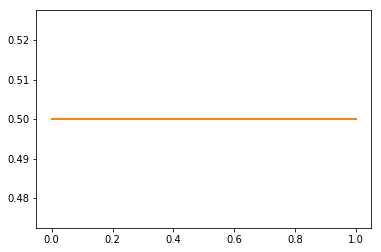

In [4]:
pyplot.plot(X, lin_reg.predict(X))
pyplot.show()

As we can see our classifier only ever outputs a value of $0.5$, no matter the input. The reason for this is the fact that we are trying to use a linear classifier on data that is not linearly separable. This becomes clear when we plot the points themselves:

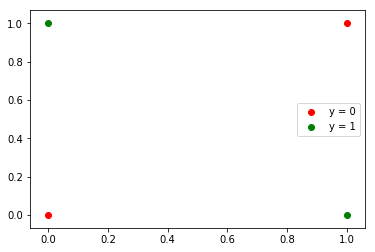

In [5]:
pyplot.scatter([0, 1], [0, 1], color='red', label='y = 0')
pyplot.scatter([0, 1], [1, 0], color='green', label='y = 1')
pyplot.legend()
pyplot.show()

In the plot above, the green dots represent the positive class and the red dots the negative class. It is impossible to separate the classes using a straight line, thus our linear classifier fails here.

### 3. Learning XOR with MLP
For this task, __the only library allowed is numpy__. Specifically, do not use a deep learning library.

We now want to implement a simple feed-forward net that can learn the XOR function. Our network should have a single $3$-dimensional hidden layer $h$ and use sigmoid activation in all layers.

1. What are the dimensions of the two weight matrices?
2. Implement the forward pass. Initialize the weight matrices randomly in $[-1; 1]$. You can omit the bias terms in this example.
3. Implement the backward pass. Use SGD optimization and $L_2$ (mean squared error) loss. Set the learning rate to $\eta = 1$.
4. Train and test your model.

#### Solution
We make use of numpy's matrix multiplication and broadcasting features for the calculations.

In [6]:
import numpy as np

We again create pairs $(x, y)$ of inputs and corresponding outputs.

In [7]:
X = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.asarray([[0], [1], [1], [0]])

print('shape of X: {}, shape of Y: {}'.format(X.shape, Y.shape))

print('  x\t y')
print('-----------')
for x, y in zip(X, Y):
    print('{}\t{}'.format(x, y))

shape of X: (4, 2), shape of Y: (4, 1)
  x	 y
-----------
[0 0]	[0]
[0 1]	[1]
[1 0]	[1]
[1 1]	[0]


In order to implement the forward pass, we first have to finalize the model architecture. We will add a single, $3$-dimensional hidden layer to the net. Thus, in total we need two non-linear transformations, $h = g_1(W_1 x)$ and $y = g_2(W_2 h)$. Note that we omit the bias terms in this simple example.

The dimensions of $W_1$ and $W_2$ can be inferred from the dimensions of the layers. Since our input layer is $2$-dimensional and our hidden layer is $3$-dimensional, we get $W_1 \in \mathbb{R}^{2 \times 3}$. Similarly, the output layer is $1$-dimensional, thus $W_2 \in \mathbb{R}^{3 \times 1}$. The parameters are initialized randomly in $[-1, 1]$.

In [8]:
W1 = 2 * np.random.rand(2, 3) - 1
W2 = 2 * np.random.rand(3, 1) - 1

print('W1:\n{}'.format(W1))
print('W2:\n{}'.format(W2))

W1:
[[-0.79215565  0.37609204  0.77526424]
 [-0.92516953 -0.88922739  0.26461833]]
W2:
[[0.07880864]
 [0.2022939 ]
 [0.98867988]]


We use the sigmoid activation function:

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Now we can implement the forward pass easily. Note that the @ operator in numpy is a regular matrix multiplication. As expected, we get some random output for each input.

In [10]:
def forward(x):
    h = sigmoid(x @ W1)
    y_out = sigmoid(h @ W2)
    return h, y_out

print('  x\t y\t   y_out')
print('----------------------------')
for x, y in zip(X, Y):
    _, y_out = forward(x)
    print('{}\t{}\t{}'.format(x, y, y_out))

  x	 y	   y_out
----------------------------
[0 0]	[0]	[0.6535977]
[0 1]	[1]	[0.65490329]
[1 0]	[1]	[0.69453756]
[1 1]	[0]	[0.69385633]


The backward pass is important for the training of the net, as it propagates the prediction error back into the net and adjusts the weights. We first have to define a loss function which determines how good or bad the prediction of our model is, given the ground truth. For this example we use a simple $L_2$ loss, which is defined as $L_2(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2$.

In [11]:
def l2_loss(y, y_out):
    return (y - y_out) ** 2 / 2

print('  x\t y\t   y_out\t    loss')
print('--------------------------------------------')
for x, y in zip(X, Y):
    _, y_out = forward(x)
    l = l2_loss(y, y_out)
    print('{}\t{}\t{}\t{}'.format(x, y, y_out, l))

  x	 y	   y_out	    loss
--------------------------------------------
[0 0]	[0]	[0.6535977]	[0.21359498]
[0 1]	[1]	[0.65490329]	[0.05954587]
[1 0]	[1]	[0.69453756]	[0.04665365]
[1 1]	[0]	[0.69385633]	[0.2407183]


To implement the backward pass, we utilize the back-propagation algorithm. The idea is to find the derivative of the loss function w.r.t. each parameter of the model. We use the chain rule to accomplish this. For example, we can calculate the derivative of the loss w.r.t. the weight matrix $W_2$ as
\begin{align}
    \frac{\partial L}{\partial W_2} &= \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial z} \frac{\partial z}{\partial W_2} \\
                                    &= (y - \hat{y}) \cdot \sigma(\hat{y}) (1 - \sigma(\hat{y})) \cdot h
\end{align}
where $z = h W_2$ (before the computation of the sigmoid). The derivative $\frac{\partial L}{\partial W_1}$ can be calculated similarly. Thus, the implementation of the backward pass consists of the derivatives and the weight updates:

In [12]:
def loss_deriv(y, y_out):
    return y - y_out

def sigmoid_deriv(s):
    return (1 - s) * s

def backward(x, y):
    global W1, W2
    h, y_out = forward(x)

    y_loss = loss_deriv(y, y_out)
    y_delta = y_loss * sigmoid_deriv(y_out)
    
    h_loss = y_delta @ W2.T
    h_delta = h_loss * sigmoid_deriv(h)
    
    W2 += h.T @ y_delta
    W1 += x.T @ h_delta

Note that for simplicity we chose a learning rate of $\eta = 1$ by omitting the parameter altogether.

Finally we can train our model by simply running the forward and backward passes a bunch of times and compare the results. Because of the array broadcasting functions of numpy, we can pass the whole input arrays $X$ and $Y$ instead of single training examples.

In [13]:
EPOCHS = 10000
for _ in range(EPOCHS):
    backward(X, Y)
print('  x\t y\t   y_out\t    loss')
print('--------------------------------------------')
for x, y in zip(X, Y):
    _, y_out = forward(x)
    l = l2_loss(y, y_out)
    print('{}\t{}\t{}\t{}'.format(x, y, y_out, l))

  x	 y	   y_out	    loss
--------------------------------------------
[0 0]	[0]	[0.02273868]	[0.00025852]
[0 1]	[1]	[0.96391531]	[0.00065105]
[1 0]	[1]	[0.96996943]	[0.00045092]
[1 1]	[0]	[0.02891493]	[0.00041804]


We can see that the net learned an approximation of the XOR function which works for all four cases.

## 4. Feed-forward Network with `scikit-learn`
In this problem, we are going to learn how to train a feed-forward neural network with the `sklearn.neural_network` module in `scikit-learn`. We will train an `sklearn.neural_network.MLPClassifier`$^1$ on the [__Iris dataset__](https://en.wikipedia.org/wiki/Iris_flower_data_set) to classify flowers.

1. Load the Iris dataset and split it into 90% for training and 10% for testing using the `train_test_split` function. Then train an `MLPClassifier` with __3 hidden layers__ on the training data after necessary preprocessing. During training, perform validation and enable the `early_stopping` functionality based on validation data by setting `validation_fraction` to $0.1$. Furthermore, the model should use an __L2 penalty__ to avoid overfitting. Evaluate your model on the test data.

2. Choose a proper metric and draw the learning curve (`sklearn.model_selection.learning_curve`) of this model using a $5$-fold cross validation split. Compute the variance across different iterations for different sizes of training data. What is the downside of setting aside a single validation set __statically__, like in the first problem, compared with the $5$-fold cross validation method?

3. As you might have noticed from the data, the distribution of the label classes is not uniform, which means, while sampling validation data from the whole set, it is possible to sample a set in a different distribution. What kind of problems can this cause? How can you deal with this situation?

$^1$The `MLPClassifier` module is quite limited in terms of customizability. For instance, [custom loss functions are not supported due to performance reasons](https://github.com/scikit-learn/scikit-learn/issues/1701). Starting from the next assignment, we will use actual deep learning libraries.

#### Solution
1. 

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from time import time

iris = load_iris()
x = iris['data']
y = iris['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, shuffle=True, random_state=42)

standardizer = StandardScaler()
model = MLPClassifier(hidden_layer_sizes=(64, 64, 4), activation='logistic', 
                      solver='lbfgs', alpha=0.001, learning_rate='adaptive',
                      early_stopping=True, max_iter=10000, n_iter_no_change=100)
pipeline = Pipeline(steps=[
    ('standardizer', standardizer),
    ('model', model)
])
tic = time()
model.fit(x_train, y_train)
print('training duration: {:0.4}s'.format(time()-tic))
model.score(x_test, y_test)

training duration: 1.8s


1.0

2. 

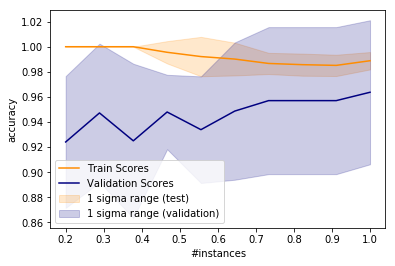

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, learning_curve
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

evaluater = lambda model, X, y_true: balanced_accuracy_score(y_true, model.predict(X))

standardizer = StandardScaler()
model = MLPClassifier(hidden_layer_sizes=(64, 64, 8), activation='logistic', 
                      solver='adam', alpha=0.001, learning_rate='adaptive',
                      max_iter=5000, n_iter_no_change=100)
pipeline = Pipeline(steps = [
    ('standardizer', standardizer),
    ('LSVC', model)
])

training_sizes = np.linspace(0.2, 1.0, 10)
cv_splitter = KFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, validation_scores = learning_curve(pipeline, x_train, y_train,
                                                              train_sizes=training_sizes,
                                                              cv=5, scoring=evaluater)

fig, ax = plt.subplots()
ax.set_xlabel('#instances')
ax.set_ylabel('accuracy')

tscore_mean = train_scores.mean(axis=1)
tscore_std = train_scores.std(axis=1)
vscore_mean = validation_scores.mean(axis=1)
vscore_std = validation_scores.std(axis=1)

ax.plot(training_sizes, tscore_mean, label='Train Scores', color='darkorange')
ax.plot(training_sizes, vscore_mean, label='Validation Scores', color='navy')
ax.fill_between(training_sizes, tscore_mean - tscore_std,
                tscore_mean + tscore_std, alpha=0.2,
                color="darkorange", label='1 sigma range (test)')
ax.fill_between(training_sizes, vscore_mean - vscore_std,
                vscore_mean + vscore_std, alpha=0.2,
                color="navy", label='1 sigma range (validation)')
ax.legend()

The goal of cross validation is to assess the generalization performance of the model. A K-fold cross validation can leads to an unbiased result since its training and validation set don't overlap and every single sub-group is used as validation set once. Using a single validation set introduces the bias caused by sampling the validation set.

3. The Bayes error between the training and test data can be different, thus the learning is untrustworthy. Use of the stratified cross validation splitter (or sampling separately for each classes) solves this problem.